In [1]:
#importing Libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model
import seaborn as sns
from sklearn.metrics import r2_score

In [2]:
#Reading the data

data = pd.read_csv("//Users/iainquinn/Crystalisation Internship/Data/DataRaw.csv")

#Making four new columns

data['ln_t_ind'] = np.log(data['induction_time'])
data['ln_S'] = np.log(data['Supersaturation'])
data['ln_(S-1)'] = np.log(data['Supersaturation']-1)
data['1/S'] = 1/(data['Supersaturation'])

#making two new datasets

data_antisolvent = data.loc[data.Method == "Antisolvent"]
data_cooling = data.loc[data.Method == "Cooling"]

In [4]:
#Making lists of each unique molecule, source and solvent in the dataset

molecule_list = data.Molecule.unique()
molecule_list_antisolvent = data_antisolvent.Molecule.unique()
molecule_list_cooling = data_cooling.Molecule.unique()

source_list = data.Source.unique()
source_list_antisolvent = data_antisolvent.Source.unique()
source_list_cooling = data_cooling.Source.unique()

solvent_list= data.solvent.unique()
solvent_list_antisolvent = data_antisolvent.solvent.unique()
solvent_list_cooling = data_cooling.solvent.unique()

In [5]:
#Transforming dataframe to  a simplified dataframe

method_1, method_2, method_3 = [], [], []
score_1, score_2, score_3 = [], [], []
slope_1, slope_2, slope_3 = [], [], []
intercept_1, intercept_2, intercept_3 = [], [], []
molecules_1, molecules_2, molecules_3=[],[],[]


for molecule in molecule_list_antisolvent:
    data_set=data_antisolvent.loc[data_antisolvent.Molecule == molecule]
    Y = np.c_[data_set["ln_t_ind"]]
    X = np.c_[data_set["ln_S"]]
    model = sklearn.linear_model.LinearRegression()
    model.fit(X, Y)
    prediction=model.predict(X)
    method_1.append("antisolvent")
    molecules_1.append(molecule)
    score_1.append(r2_score(Y, prediction))
    slope_1.append(float(model.coef_))
    intercept_1.append(float(model.intercept_))
    
    Y = np.c_[data_set["ln_t_ind"]]
    X = np.c_[data_set["ln_(S-1)"]]
    model = sklearn.linear_model.LinearRegression()
    model.fit(X, Y)
    prediction=model.predict(X)
    method_2.append("antisolvent")
    molecules_2.append(molecule)
    score_2.append(r2_score(Y, prediction))
    slope_2.append(float(model.coef_))
    intercept_2.append(float(model.intercept_))
       
    Y = np.c_[data_set["ln_t_ind"]]
    X = np.c_[data_set["1/S"]]
    model = sklearn.linear_model.LinearRegression()
    model.fit(X, Y)
    prediction=model.predict(X)
    method_3.append("antisolvent")
    molecules_3.append(molecule)
    score_3.append(r2_score(Y, prediction))
    slope_3.append(float(model.coef_))
    intercept_3.append(float(model.intercept_))
    
for molecule in molecule_list_cooling:
    data_set=data_cooling.loc[data_cooling.Molecule == molecule]
    Y = np.c_[data_set["ln_t_ind"]]
    X = np.c_[data_set["ln_S"]]
    model = sklearn.linear_model.LinearRegression()
    model.fit(X, Y)
    prediction=model.predict(X)
    method_1.append("cooling")
    molecules_1.append(molecule)
    score_1.append(r2_score(Y, prediction))
    slope_1.append(float(model.coef_))
    intercept_1.append(float(model.intercept_))
    
    Y = np.c_[data_set["ln_t_ind"]]
    X = np.c_[data_set["ln_(S-1)"]]
    model = sklearn.linear_model.LinearRegression()
    model.fit(X, Y)
    prediction=model.predict(X)
    method_2.append("cooling")
    molecules_2.append(molecule)
    score_2.append(r2_score(Y, prediction))
    slope_2.append(float(model.coef_))
    intercept_2.append(float(model.intercept_))
       
    Y = np.c_[data_set["ln_t_ind"]]
    X = np.c_[data_set["1/S"]]
    model = sklearn.linear_model.LinearRegression()
    model.fit(X, Y)
    prediction=model.predict(X)
    method_3.append("cooling")
    molecules_3.append(molecule)
    score_3.append(r2_score(Y, prediction))
    slope_3.append(float(model.coef_))
    intercept_3.append(float(model.intercept_))
    
molecule_df_1 = pd.DataFrame(list(zip(method_1, molecules_1, slope_1, intercept_1, score_1)) , columns=['method','molecule','slope', 'intercept', 'r2'])
molecule_df_2 = pd.DataFrame(list(zip(method_2, molecules_2, slope_2, intercept_2, score_2)) , columns=['method','molecule','slope', 'intercept', 'r2'])
molecule_df_3 = pd.DataFrame(list(zip(method_3, molecules_3, slope_3, intercept_3, score_3)) , columns=['method','molecule','slope', 'intercept', 'r2'])

In [9]:
molecule_antisolvent_df_1 = molecule_df_1.loc[molecule_df_1.method == 'antisolvent']
molecule_cooling_df_1 = molecule_df_1.loc[molecule_df_1.method == 'cooling']

molecule_antisolvent_df_2 = molecule_df_2.loc[molecule_df_2.method == 'antisolvent']
molecule_cooling_df_2 = molecule_df_2.loc[molecule_df_2.method == 'cooling']

molecule_antisolvent_df_3 = molecule_df_3.loc[molecule_df_3.method == 'antisolvent']
molecule_cooling_df_3 = molecule_df_3.loc[molecule_df_3.method == 'cooling']

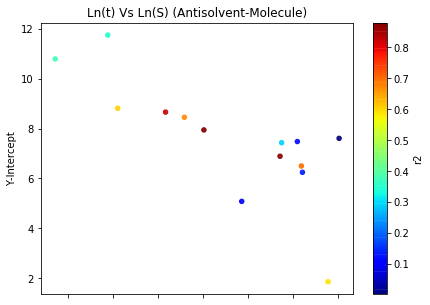

In [36]:
molecule_antisolvent_df_1.plot(kind= 'scatter', x="slope", y= "intercept",c="r2",colorbar=True, alpha = 0.9, 
                               cmap=plt.get_cmap("jet"), figsize=(7,5), title ="(Antisolvent-Molecule)")
plt.xlabel("Slope")
plt.ylabel("Y-Intercept")
plt.savefig("/Users/iainquinn/Crystalisation Internship/" +'hi.png')